# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)
Student Name and ID: Sudharsan Srinivasan : 1001755919 <-- Only this student will submit the assignment

Student Name and ID: Wajid Ahammed Syed : 1001756597


Notes: When submitting, fill your name and ID in this cell. [1 point]

Do not to forget to cite any external sources used by you.

https://medium.com/@avulurivenkatasaireddy/k-nearest-neighbors-and-implementation-on-iris-data-set-f5817dd33711

https://www.geeksforgeeks.org/project-knn-classifying-iris-dataset/

https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/

## Programming Assignment Submission Instructions ( 2 Points)


Step 3: Rename this submission file as 'yourLastName_Last4digitsofyourID_NN.ipynb' [1 point]

Step 4: Place this file inside the folder 'PA#2_Classification_yourLastName' [1 point]

## Programming Assignment Details (25 Points)



For this assignment use Jupyter notebook, Panda, and scikit.

1) Load iris dataset from sklearn datasets. [1 points]


2) Split your dataset 70% for training, and 30% for testing the classifier. [2 points]


3) Select only 2 attributes for training and testing your model. [2 points]


4) Use Euclidean distance. [3 points]


5) Test the classifier with three diferent numbers for neighbors and record the results. [3 points]


6) Use comments to explain your code and variable names.[2 points]


7) Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]


8) Plot the classifier in a 2D projection for all three different numbers.[6 points]

## Report (20 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:


1) Describe the Nearest Neighbors method, [5 points]


2) Explain what was your criteria for selecting the two attributes, [5 points]


3) Visualizations of the classifier in a 2D projection, for all three different number of neighbors,[5 points]


4) Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

## Canvas Submission (2 Points)

Step 5 : Submit your zipped folder containing PA#2_Classification_yourLastName (PA#2_Classification_yourLastName.zip) on Canvas

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [49]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix,classification_report #To import confusion matrix and report 
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

In [50]:
iris = load_iris()#loading the iris dataset from datasets
ir = pd.DataFrame(iris.data)#converting the iris array into dataframe
ir.columns = iris.feature_names# assigning the iris array feature names to ir dataframe column names
ir['class'] = iris.target #assigning the target variable values to class 
#ir['class']
ir.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
X=iris.data #assigning entire data of iris to X
y=iris.target #assigning target variables to y
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3) #splitting the data into 70% for train and 30% for testing

In [52]:
X_train=pd.DataFrame(X_train) #converting X_train array into dataframe
X_train.columns=iris.feature_names# assigning iris array feature names to X_train dataframe column names
X_test=pd.DataFrame(X_test) #converting X_train array into dataframe
X_test.columns=iris.feature_names #assigning iris array feature names to X_train dataframe column names

In [53]:
X_train=X_train[["sepal length (cm)","sepal width (cm)"]] #selecting two attributes and replacing in same X_train dataset
X_test=X_test[["sepal length (cm)","sepal width (cm)"]] #selecting two attributes and replacing in same X_test datasett

Accuracy: 0.7111111111111111

Confusion Matrix: [[16  0  0]
 [ 0 10  5]
 [ 0  8  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.56      0.67      0.61        15
           2       0.55      0.43      0.48        14

    accuracy                           0.71        45
   macro avg       0.70      0.70      0.70        45
weighted avg       0.71      0.71      0.71        45



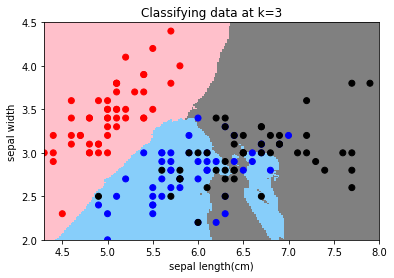

In [70]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean') #creating KNN classifier for n=3
knn.fit(X_train,y_train) #training the model using training set
prediction=knn.predict(X_test)  #predict the accuracy using test dataset
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("\nConfusion Matrix:",confusion_matrix(y_test,prediction)) #Printing confusion matrix
print("\nClassification Report:\n",classification_report(y_test, prediction)) #Printing classification report 
#Plot the decision boundary i.e; min max which are used for limitting
x_maximum = X[:, 0].max()+.1 #calculating and assigning the maximum value of sepal length
x_minimum = X[:, 0].min()  #calculating and assigning the minimun value of sepal length
y_maximum =X[:, 1].max() +.1 #calculating and assigning the maximum value of sepal width
y_minimum = X[:, 1].min()  #calculating and assigning the minimun value of sepal width
#returns coordinate matrices mesh for the decision boundary
xcor, ycor = np.meshgrid(np.linspace(x_minimum, x_maximum, 200),
                        np.linspace(y_minimum, y_maximum, 200))
#assigning few colors for background color and observed values
background_color=ListedColormap(["pink","lightskyblue","grey"])
observation_color= ListedColormap (["red", "blue", "black"])
#reshaping the mesh grid matrix
Z = Z.reshape(xcor.shape)
#Plotting figure
plt.figure()
#plotting different colors in 2d 
plt.pcolormesh(xcor, ycor, Z,cmap=background_color)
#assigning scatter plot with sepal length , sepal width and target variable 
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=observation_color)
# plotting the limits of x and y axis
plt.xlim(xcor.min(), xcor.max())
plt.ylim(ycor.min(), ycor.max())
#displaying the scatter plot
plt.title("Classifying data at k=3")
plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width")
plt.show()

Accuracy: 0.7111111111111111

Confusion Matrix: [[16  0  0]
 [ 0  9  6]
 [ 0  7  7]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.56      0.60      0.58        15
           2       0.54      0.50      0.52        14

    accuracy                           0.71        45
   macro avg       0.70      0.70      0.70        45
weighted avg       0.71      0.71      0.71        45



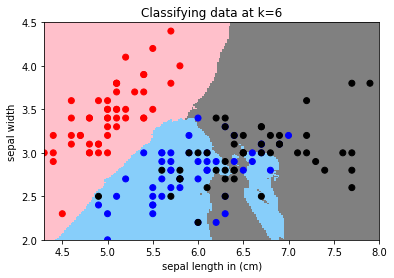

In [69]:
knn=KNeighborsClassifier(n_neighbors=6,metric='euclidean') #creating the KNN classifier for n=6
knn.fit(X_train,y_train) #train the model using training set
prediction=knn.predict(X_test)  #predict the accuracy using test dataset
print("Accuracy:",metrics.accuracy_score(y_test,prediction))
print("\nConfusion Matrix:",confusion_matrix(y_test,prediction)) #Printing confusion matrix
print("\nClassification Report:\n",classification_report(y_test, prediction)) #Printing classification report 
#Plot the decision boundary i.e; min max which are used for limitting
x_maximum = X[:, 0].max()+.1 #calculating and assigning the maximum value of sepal length
x_minimum = X[:, 0].min()  #calculating and assigning the minimun value of sepal length
y_maximum =X[:, 1].max() +.1 #calculating and assigning the maximum value of sepal width
y_minimum = X[:, 1].min()  #calculating and assigning the minimun value of sepal width
#returns coordinate matrices mesh for the decision boundary
xcor, ycor = np.meshgrid(np.linspace(x_minimum, x_maximum, 200),
                        np.linspace(y_minimum, y_maximum, 200))
#assigning few colors for background color and observed values
background_color=ListedColormap(["pink","lightskyblue","grey"])
observation_color= ListedColormap (["red", "blue", "black"])
#reshaping the mesh grid matrix
Z = Z.reshape(xcor.shape)
#Plotting figure
plt.figure()
#plotting different colors in 2d 
plt.pcolormesh(xcor, ycor, Z,cmap=background_color)
#assigning scatter plot with sepal length , sepal width and target variable 
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=observation_color)
# plotting the limits of x and y axis
plt.xlim(xcor.min(), xcor.max())
plt.ylim(ycor.min(), ycor.max())
#displaying the scatter plot
plt.title("Classifying data at k=6")
plt.xlabel("sepal length in (cm)")
plt.ylabel("sepal width")
plt.show()

Accuracy: 0.7777777777777778

Confusion Matrix: [[16  0  0]
 [ 0 10  5]
 [ 0  5  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.67      0.67      0.67        15
           2       0.64      0.64      0.64        14

    accuracy                           0.78        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.78      0.78      0.78        45



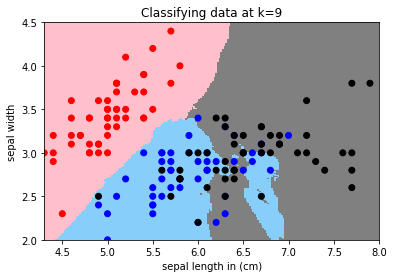

In [67]:
knn=KNeighborsClassifier(n_neighbors=9,metric='euclidean') #creating KNN classifier for n=9
knn.fit(X_train,y_train) #train the model using training set
prediction=knn.predict(X_test)  #predict the accuracy using test dataset
print("Accuracy:",metrics.accuracy_score(y_test,prediction))#Printing accuracy
print("\nConfusion Matrix:",confusion_matrix(y_test,prediction)) #Printing confusion matrix
print("\nClassification Report:\n",classification_report(y_test, prediction)) #Printing classification report 
#Plot the decision boundary i.e; min max which are used for limitting
x_maximum = X[:, 0].max()+.1 #calculating and assigning the maximum value of sepal length
x_minimum = X[:, 0].min()  #calculating and assigning the minimun value of sepal length
y_maximum =X[:, 1].max() +.1 #calculating and assigning the maximum value of sepal width
y_minimum = X[:, 1].min()  #calculating and assigning the minimun value of sepal width
#returns coordinate matrices mesh for the decision boundary
xcor, ycor = np.meshgrid(np.linspace(x_minimum, x_maximum, 200),
                        np.linspace(y_minimum, y_maximum, 200))
#assigning few colors for background color and observed values
background_color=ListedColormap(["pink","lightskyblue","grey"])
observation_color= ListedColormap (["red", "blue", "black"])
#reshaping the mesh grid matrices
Z = Z.reshape(xcor.shape)
#Plotting figure
plt.figure()
#plotting different colors in 2d 
plt.pcolormesh(xcor, ycor, Z,cmap=background_color)
#assigning scatter plot with sepal length , sepal width and target variable 
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=observation_color)
# plotting the limits of x and y axis
plt.xlim(xcor.min(), xcor.max())
plt.ylim(ycor.min(), ycor.max())
#displaying the scatter plot
plt.title("Classifying data at k=9")
plt.xlabel("sepal length in (cm)")
plt.ylabel("sepal width")
plt.show()